(array([ 1.04214286,  0.12428571, -0.05428571]), 1)
a= 1.0421428571342242 
 b= 0.12428571428162227 c= -0.054285714307653166


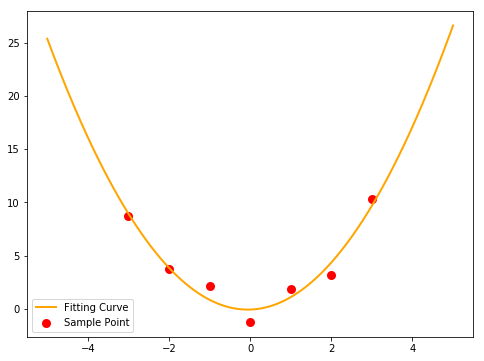

In [2]:
"调用scipy中最小二乘函数leastsq估计参数，leastsq使用的是梯度下降法"
"二次函数拟合"


import numpy as np
from scipy.optimize import leastsq    #导入最小二乘法函数
import matplotlib.pyplot as plt
%matplotlib inline


#采样点(Xi,Yi)
Xi=np.array([0,1,2,3,-1,-2,-3])
Yi=np.array([-1.21,1.9,3.2,10.3,2.2,3.71,8.7])
 
    
#拟合函数func及误差error
def func(p,x):
    a,b,c=p      #p为待估计的参数
    return a*x**2+b*x+c


def error(p,x,y):
    #print(s)
    return func(p,x)-y      #x、y都是列表，故返回值也是个列表
 
 


#主函数从此开始
p0=[5,2,10]    #指定参数初始值

Para=leastsq(error,p0,args=(Xi,Yi))    #调用leastsq函数
#leastsq(func, x0,args=(),...)包含三个形参
#func表示误差函数
#x0表示待估计参数初始值列表
#args表示数据采样点


print(Para)
a,b,c=Para[0]
print("a=",a,'\n',"b=",b,"c=",c)
 
 

#绘图，看拟合效果
plt.figure(figsize=(8,6))
plt.scatter(Xi,Yi,color="red",label="Sample Point",linewidth=3)    #画样本点

x=np.linspace(-5,5,1000)
y=a*x**2+b*x+c

plt.plot(x,y,color="orange",label="Fitting Curve",linewidth=2)     #画拟合曲线
plt.legend()
plt.show()

真实参数: 1 5 2
leastsq方法拟合参数 [0.98878408 4.99079501 2.02431117]


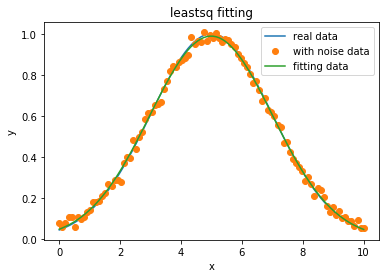

In [5]:
"高斯函数拟合"



import numpy as np
from scipy.optimize import leastsq 
import matplotlib.pyplot as plt
%matplotlib inline


def func(x, p):
    #定义拟合函数 y=a*np.exp(-(x-b)**2/(2*c**2))
    a, b, c = p
    return a*np.exp(-(x-b)**2/(2*c**2))


def residuals(p, y, x):
    #实验数据x, y和拟合函数之间的差，p为拟合需要找到的系数
    return y - func(x, p)


#真实数据
x = np.linspace(0, 10, 100)
a, b, c = 1, 5, 2 
y0 = func(x, [a, b, c])


#加入噪声之后的实验数据
np.random.seed(0)    #保证每次生成的随机数是一样的
y1 = y0 + 0.02 * np.random.randn(len(x))


#参数初始值
P0 = [2, 0.40, 0.2]
result_fit1 = leastsq(residuals,P0,args=(y1,x))     #调用leastsq函数

print ("真实参数:", a, b, c)
print ("leastsq方法拟合参数", result_fit1[0])



#绘图
plt.plot(x, y0, label="real data")               #绘制真实数据
plt.plot(x, y1,"o", label="with noise data")    #绘制带有噪声数据
plt.plot(x, func(x, result_fit1[0]), label="fitting data")      #绘制拟合函数

plt.title('leastsq fitting')                 #添加标题
plt.xlabel('x')                             #x轴名称
plt.ylabel('y')                             #y轴名称
plt.legend()                                #添加图例
plt.show()                                  #显示图像